In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve





df = pd.read_csv('creditcard.csv')

## 1. 데이터 로드 및 기본 탐색

In [25]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [28]:
# 클래스의 비율 확인(normalize = True: 개수가 아닌 비율로 변환하여 보여줌)
print(df['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [29]:
# 정상 거래와 사기 거래 개수 확인(shape[0]: 행의 개수를 셈)
normal_count = df[df['Class'] == 0].shape[0]
fraud_count = df[df['Class'] == 1].shape[0]

print(f"정상 거래(Class=0): {normal_count:,}건")
print(f"사기 거래(Class=1): {fraud_count:,}건")

정상 거래(Class=0): 284,315건
사기 거래(Class=1): 492건


## 2. 샘플링

In [30]:
# 사기 거래(Class=1) 데이터만 추출 (전부 유지)
fraud_df = df[df['Class'] == 1]

# 정상 거래(Class=0) 데이터만 추출
normal_df = df[df['Class'] == 0]

# (2) 정상 거래 10,000건 무작위 샘플링
normal_sample = normal_df.sample(n=10000, random_state=42)

# (3) 새로운 분석용 데이터프레임 생성(axis=0: 위아래로 합침)
df_new = pd.concat([fraud_df, normal_sample], axis=0)

# (4) 샘플링 후 class 비율 출력
print("=== 샘플링 후 Class 비율 ===")
print(df_new['Class'].value_counts(normalize=True))

print("\n=== 샘플링 후 데이터 건수 ===")
print(df_new['Class'].value_counts())

=== 샘플링 후 Class 비율 ===
Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64

=== 샘플링 후 데이터 건수 ===
Class
0    10000
1      492
Name: count, dtype: int64


## 3. 데이터 전처리

In [31]:
# 1. StandardScaler 객체 생성
scaler = StandardScaler()

# 2. Amount 변수 표준화 및 Amount_Scaled 생성 
# fit_transform을 사용하여 평균 0, 분산 1로 변환합니다. fit: 데이터의 평균과 분산을 계산 / transform: 표준화
# scaler가 2차원 데이터(표 형태) 입력을 요구하므로 [['Amount']]를 사용
df_new['Amount_Scaled'] = scaler.fit_transform(df_new[['Amount']])

# 3. 원본 Amount 변수 제거 
df_new = df_new.drop('Amount', axis=1)

# 4. X(특성), y(타겟) 데이터 분리 
# Class 컬럼을 제외한 모든 변수가 X가 됩니다.
X = df_new.drop('Class', axis=1)
# Class 컬럼이 우리가 맞춰야 할 정답(y)이 됩니다.
y = df_new['Class']

# === 결과 확인 ===
print("=== 1. 전처리 후 X 데이터 상위 5개 (Amount_Scaled 확인) ===")
print(X.head())

print("\n=== 2. X, y 데이터 크기(Shape) 확인 ===")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

=== 1. 전처리 후 X 데이터 상위 5개 (Amount_Scaled 확인) ===
        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V20       V21       V22  \
541  -2.537387  1.391657 -2.770089  ...  0.126911  0.517232 -0.035049   
623   0.325574 -0.067794 -0.270953  ...  2.102339  0.661696  0.435477   
4920  0.562320 -0.399147 -0.238253  ... -0.430022 -0.294166 -0.932391   
6108 -3.496197 -0.248778 -0.247768  ... -0.171608  0.573574  0.176968   
6329  1.713445 -0.496358 -1.282858  ...  0.009061 -0.379068 -0.704181   

           V23       V24       V25       V26       V27  

## 4. 학습 데이터와 테스트 데이터 분할

In [32]:
# 1. 데이터 분할
# test_size=0.2: 전체의 20%를 테스트용으로 떼어냅니다 (즉, 8:2 분할).
# stratify=y: 정답(y)의 0과 1 비율을 학습셋과 테스트셋에서도 똑같이 유지합니다.
# random_state=42: 매번 똑같이 섞이도록 고정합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. 분할된 데이터 크기 확인
print(f"학습 데이터(X_train) 크기: {X_train.shape}")
print(f"테스트 데이터(X_test) 크기: {X_test.shape}")

# 3. Class 비율 확인 (Stratify 동작 확인) 
print("\n=== 학습 데이터(y_train) Class 비율 ===")
print(y_train.value_counts(normalize=True))

print("\n=== 테스트 데이터(y_test) Class 비율 ===")
print(y_test.value_counts(normalize=True))

학습 데이터(X_train) 크기: (8393, 30)
테스트 데이터(X_test) 크기: (2099, 30)

=== 학습 데이터(y_train) Class 비율 ===
Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64

=== 테스트 데이터(y_test) Class 비율 ===
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64


## 5. SMOTE 적용

In [33]:
# 1. SMOTE 객체 생성
# random_state=42로 고정하여 결과의 일관성을 유지합니다.
smote = SMOTE(random_state=42)

# 2. 학습 데이터(X_train)에만 오버샘플링 적용
# fit_resample 메서드를 사용하여 데이터를 생성합니다.
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 3. SMOTE 적용 전후 데이터 건수 확인 
print("=== SMOTE 적용 전 학습 데이터 클래스 분포 ===")
print(y_train.value_counts())

print("\n=== SMOTE 적용 후 학습 데이터 클래스 분포 ===")
print(y_train_over.value_counts())

# 4. 결과 확인
print(f"\n기존 데이터 개수: {len(y_train)}")
print(f"증강된 데이터 개수: {len(y_train_over)}")

=== SMOTE 적용 전 학습 데이터 클래스 분포 ===
Class
0    7999
1     394
Name: count, dtype: int64

=== SMOTE 적용 후 학습 데이터 클래스 분포 ===
Class
0    7999
1    7999
Name: count, dtype: int64

기존 데이터 개수: 8393
증강된 데이터 개수: 15998


## 6. 모델 학습

In [34]:
# 1. 모델 선정 및 학습
# Random Forest 모델을 사용합니다. (n_estimators=100 기본값)
# random_state=42로 고정하여 결과를 재현합니다.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("모델 학습 중... (잠시만 기다려주세요)")
model.fit(X_train_over, y_train_over)
print("학습 완료!")

# 2. 테스트 데이터 예측
# predict: 0(정상)인지 1(사기)인지 딱 잘라서 예측한 값
y_pred = model.predict(X_test)

# predict_proba: 1(사기)일 '확률' (0.0 ~ 1.0)
# PR-AUC 계산과 나중에 Threshold 조정에 필요합니다.
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 3. 성능 평가 지표 출력
print("\n=== Classification Report (Precision, Recall, F1-score) ===")
print(classification_report(y_test, y_pred))

print("=== PR-AUC (Average Precision Score) ===")   
# PR-AUC는 1에 가까울수록 좋습니다.
pr_auc = average_precision_score(y_test, y_pred_proba)
print(f"PR-AUC: {pr_auc:.4f}")

모델 학습 중... (잠시만 기다려주세요)
학습 완료!

=== Classification Report (Precision, Recall, F1-score) ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.95      0.89      0.92        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.96      2099
weighted avg       0.99      0.99      0.99      2099

=== PR-AUC (Average Precision Score) ===
PR-AUC: 0.9537


## 7. 최종 성능 평가(개선)

=== 최적의 Threshold 탐색 결과 ===
Best Threshold (임계값): 0.6400
Best F1-Score: 0.9239
Recall (재현율): 0.8673
Precision (정밀도): 0.9884

=== 최종 Classification Report (Optimized Threshold) ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.99      0.87      0.92        98

    accuracy                           0.99      2099
   macro avg       0.99      0.93      0.96      2099
weighted avg       0.99      0.99      0.99      2099



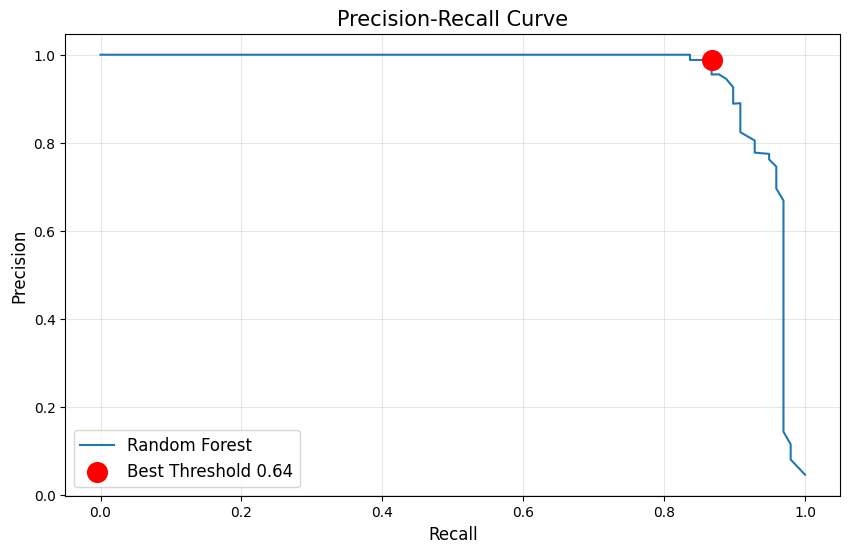

In [35]:
# 1. Precision-Recall 곡선 값 계산
# y_test: 실제 정답, y_pred_proba: 모델이 예측한 확률
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 2. F1-score 계산 (모든 Threshold에 대해)
# 분모가 0이 되는 것을 방지하기 위한 안전장치 포함
numerator = 2 * recalls * precisions
denominator = recalls + precisions
f1_scores = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)

# 3. 최적의 Threshold 찾기 (F1-score가 가장 높은 지점)
best_idx = np.argmax(f1_scores) # F1점수가 가장 높은 인덱스
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_recall = recalls[best_idx]
best_precision = precisions[best_idx]

# 4. 결과 출력
print("=== 최적의 Threshold 탐색 결과 ===")
print(f"Best Threshold (임계값): {best_threshold:.4f}")
print(f"Best F1-Score: {best_f1:.4f}")
print(f"Recall (재현율): {best_recall:.4f}")
print(f"Precision (정밀도): {best_precision:.4f}")

# 5. 최적 Threshold 적용하여 최종 평가
# 확률이 best_threshold보다 크면 1(사기), 아니면 0(정상)으로 판단
y_pred_new = (y_pred_proba >= best_threshold).astype(int)

print("\n=== 최종 Classification Report (Optimized Threshold) ===")
print(classification_report(y_test, y_pred_new))

# 6. PR 곡선 시각화 (리포트 제출용)
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, linestyle='-', label='Random Forest')
# 최적의 지점을 빨간 점으로 표시
plt.scatter(best_recall, best_precision, marker='o', color='red', s=200, 
            label=f'Best Threshold {best_threshold:.2f}', zorder=10)

plt.title('Precision-Recall Curve', fontsize=15)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()